In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Downloading tiles from a WMTS

Author: Cor Zuurmond 

---

This notebook explains how to download tiles from a WMTS given a location (coordinate). 

We use the [aerial imagery WMTS](https://geodata.nationaalgeoregister.nl/luchtfoto/rgb/wmts?request=GetCapabilities&service=wmts) from PDOK. PDOK contains Dutch open data.

In [2]:
import matplotlib.pyplot as plt
from IPython.display import Image

import building_detector.wmts

In [3]:
# WMTS
wmts_base = 'https://geodata.nationaalgeoregister.nl/luchtfoto/rgb/wmts'
layer = 'Actueel_ortho25'

# Coordinate to request
amsterdam = 52.3522554, 4.9130319

In [4]:
zoom = 12
tile_col, tile_row = building_detector.wmts.gps_to_tile(*amsterdam, zoom=zoom)
tile_col, tile_row

(2103, 1346)

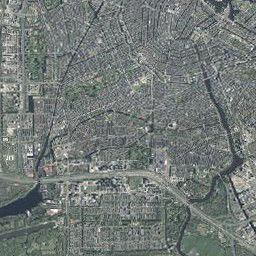

In [5]:
building_detector.wmts.get_wmts_tile_from_coordinate(amsterdam, wmts_base, layer, zoom=12)

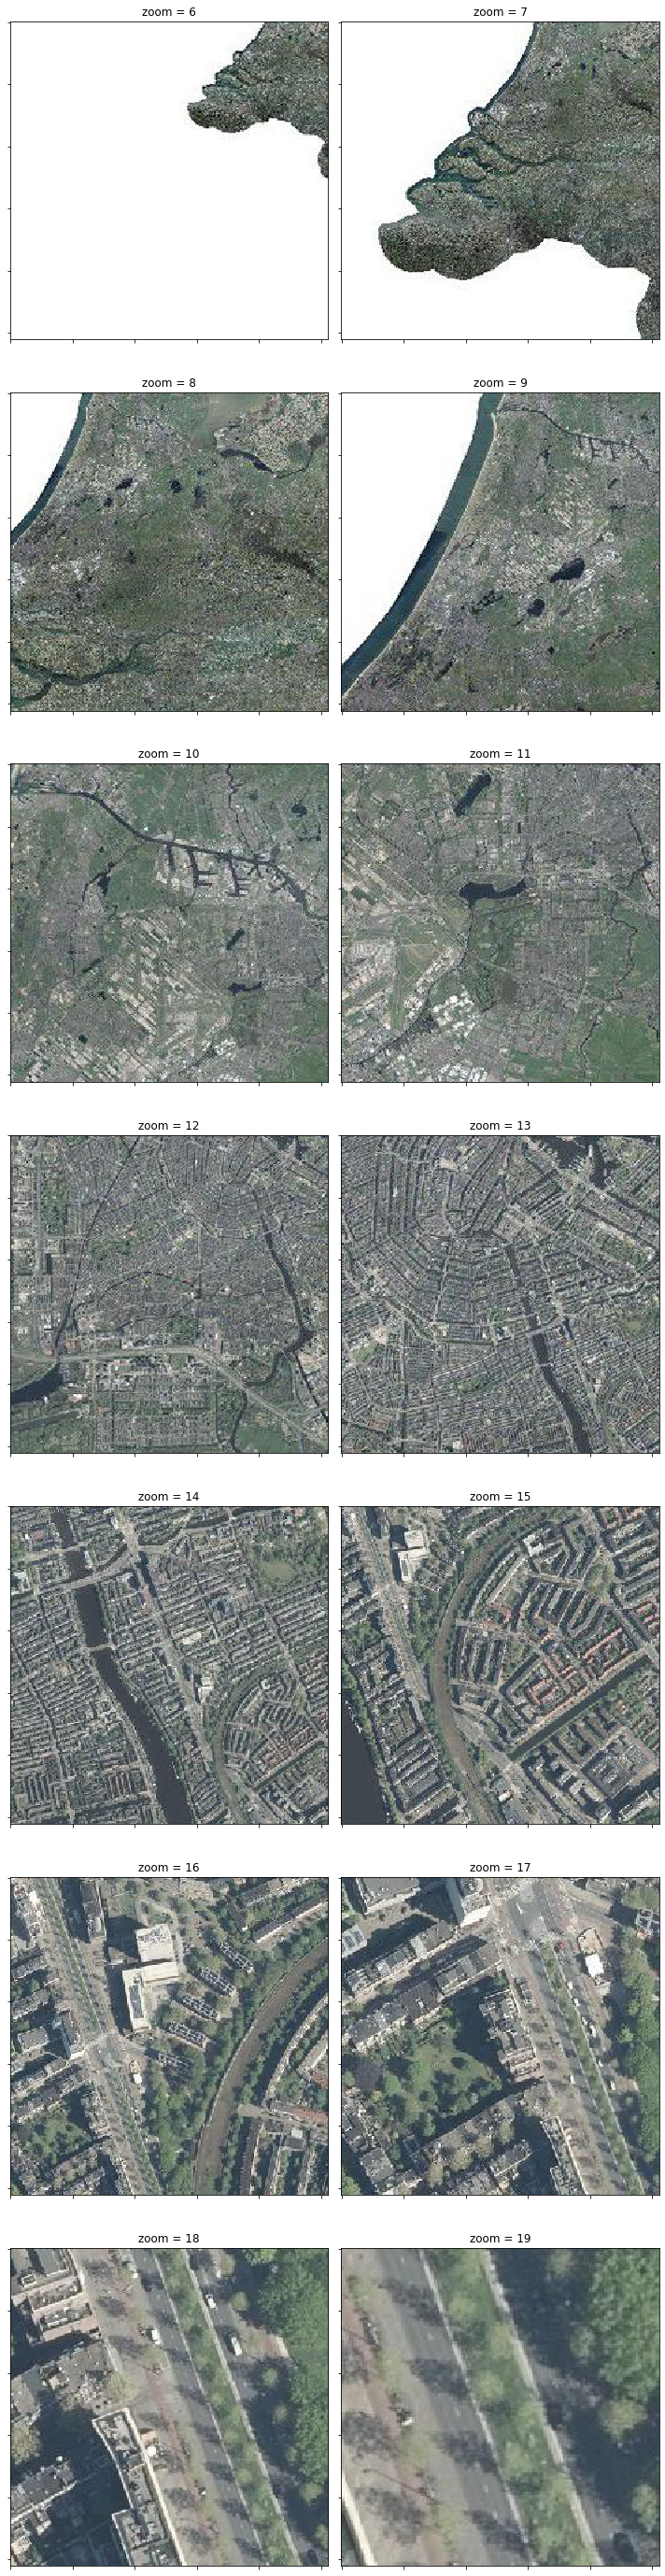

In [6]:
fig, axi = plt.subplots(7, 2, figsize=(10, 40))
for ax, zoom in zip(axi.flatten(), range(6, 20)):
    tile = building_detector.wmts.get_wmts_tile_from_coordinate(
        amsterdam, 
        wmts_base, 
        layer, 
        zoom=zoom
    )
    ax.imshow(tile)
    ax.set_title(f'zoom = {zoom}')
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    plt.tight_layout()